In [1]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import cluster, datasets, metrics
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
import matplotlib.image as mpimg
from PIL import Image
import numpy as np
import math
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import MinMaxScaler
from array import array
from keras.utils import to_categorical
from keras.utils import np_utils
from sklearn import preprocessing
#from sklearn.mixture import GMM
#from learning_model import *
#from sklearn.cross_validation import train_test_split
#from data_handle import * 

Using TensorFlow backend.


In [33]:
data = np.genfromtxt('./interface/rsrp_set33_noleft.csv', delimiter=',')
df = pd.DataFrame(data,columns=['x','y','pci','rsrp'],index=None)

#print(df)
df.to_csv('./interface/rsrp_set16_noleft_pd.csv',index=None)

ValueError: Shape of passed values is (5, 181), indices imply (4, 181)

                x           y         pci        rsrp
count  178.000000  178.000000  178.000000  178.000000
mean    75.567966   13.274449   40.095506  -86.777530
std     14.074680    6.255202    1.191724   10.174758
min     49.057000    0.854500   38.000000 -113.850000
25%     64.405000    8.275000   39.000000  -93.532870
50%     76.213000   13.606000   40.000000  -86.234172
75%     87.115750   18.265750   41.000000  -79.217746
max    102.013000   24.023500   42.000000  -65.332800


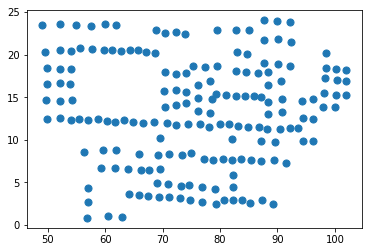

In [27]:
rem_pci_all = pd.read_csv("./interface/rsrp_set16_noleft_pd.csv")
#rem_pci_all = pd.read_csv("./interface/rsrp_set33_nodis_noleft.csv")
#rem_pci_all = pd.read_csv("rem_pci_train_pd.csv")
#rem_pci = pd.read_csv("rem_rsrp_train_pd.csv")
#rem_test = pd.read_csv("rem_test_pd.csv")
#rem_pci_np = np.genfromtxt('rem_pci_train.csv', delimiter=',')
#rem_rsrp = pd.read_csv("rem_rsrp_train.csv")
#print(rem_pci_all)
plt.scatter(rem_pci_all['x'], rem_pci_all['y'], s=50);
#print(type(rem_pci_all))
print(rem_pci_all.describe())



In [28]:
#rem_pci_all = preprocessing.scale(rem_pci_all)
#print (rem_pci_all)
#np.savetxt('normalize.csv', rem_pci_all, delimiter=',', fmt='%f')

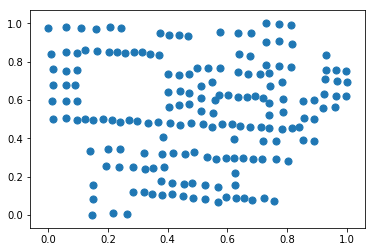

In [29]:
#print (rem_pci_all)
#print (type(rem_pci_all))
#print(rem_pci_all)

rem_pci_all.insert(4,"pci_37",0)
rem_pci_all.insert(5,"pci_38",0) 
rem_pci_all.insert(6,"pci_39",0) 
rem_pci_all.insert(7,"pci_40",0)
rem_pci_all.insert(8,"pci_41",0) 
rem_pci_all.insert(9,"pci_42",0) 
'''
rem_pci_all.insert(5,"pci_37",0)
rem_pci_all.insert(6,"pci_38",0) 
rem_pci_all.insert(7,"pci_39",0) 
rem_pci_all.insert(8,"pci_40",0)
rem_pci_all.insert(9,"pci_41",0) 
rem_pci_all.insert(10,"pci_42",0) 
'''

for i in range(0,len(rem_pci_all)):
    if rem_pci_all.iloc[i,2] == 37:
        rem_pci_all.iloc[i,4] = "1"
    if rem_pci_all.iloc[i,2] == 38:
        rem_pci_all.iloc[i,5] = "1"
    if rem_pci_all.iloc[i,2] == 39:
        rem_pci_all.iloc[i,6] = "1"
    if rem_pci_all.iloc[i,2] == 40:
        rem_pci_all.iloc[i,7] = "1"
    if rem_pci_all.iloc[i,2] == 41:
        rem_pci_all.iloc[i,8] = "1"
    if rem_pci_all.iloc[i,2] == 42:
        rem_pci_all.iloc[i,9] = "1"
'''
for i in range(0,len(rem_pci_all)):
    if rem_pci_all.iloc[i,2] == 3700:
        rem_pci_all.iloc[i,5] = "1"
    if rem_pci_all.iloc[i,2] == 3800:
        rem_pci_all.iloc[i,6] = "1"
    if rem_pci_all.iloc[i,2] == 3900:
        rem_pci_all.iloc[i,7] = "1"
    if rem_pci_all.iloc[i,2] == 4000:
        rem_pci_all.iloc[i,8] = "1"
    if rem_pci_all.iloc[i,2] == 4100:
        rem_pci_all.iloc[i,9] = "1"
    if rem_pci_all.iloc[i,2] == 4200:
        rem_pci_all.iloc[i,10] = "1"
'''
#print(rem_pci_all)
#print("==========")
rem_pci_all = rem_pci_all[['x','y','rsrp','pci_37','pci_38','pci_39','pci_40','pci_41','pci_42','pci']]
#rem_pci_all = rem_pci_all[['x','y','rsrp','dis','pci_37','pci_38','pci_39','pci_40','pci_41','pci_42','pci']]
rem_pci_all_copy = rem_pci_all
rem_pci_all_cut = rem_pci_all.drop(['pci'], axis=1)
#print(rem_pci_all)
#print(rem_pci_all)
#print("===")  
rem_pci_all=rem_pci_all_cut.values
#print (type(rem_pci_all))
#print (rem_pci_all)
#:::Normalize[0,1]
#print(rem_pci_all_cut)
min_max_scaler = preprocessing.MinMaxScaler()
rem_pci_all_n = min_max_scaler.fit_transform(rem_pci_all_cut)
#:::Normalize[-1,1]
  #max_abs_scaler = preprocessing.MaxAbsScaler()
  #rem_pci_all_n = max_abs_scaler.fit_transform(rem_pci_all_cut)

#:::Standardisation
#print(rem_pci_all_cut)
  #rem_pci_all_n = preprocessing.scale(rem_pci_all_cut)
#print(rem_pci_all_n.mean(axis=0))
#print(rem_pci_all_n.std(axis=0))
#print(rem_pci_all_n)
#print("===")  
rem_pci_all_n_pd = pd.DataFrame(rem_pci_all_n,columns = ['x','y','rsrp','pci_37','pci_38','pci_39','pci_40','pci_41','pci_42'])
#print(rem_pci_all_n_pd)
rem_pci_all_n_pd.to_csv("./debug/rem_pci_all_n_pd.csv")

for i in range(0,len(rem_pci_all_n_pd)):
    if rem_pci_all_n_pd.iloc[i,3] == 1:
        rem_pci_all_n_pd.iloc[i,3] = "0.2"
    if rem_pci_all_n_pd.iloc[i,4] == 1:
        rem_pci_all_n_pd.iloc[i,4] = "0.2"
    if rem_pci_all_n_pd.iloc[i,5] == 1:
        rem_pci_all_n_pd.iloc[i,5] = "0.2"
    if rem_pci_all_n_pd.iloc[i,6] == 1:
        rem_pci_all_n_pd.iloc[i,6] = "0.2"
    if rem_pci_all_n_pd.iloc[i,7] == 1:
        rem_pci_all_n_pd.iloc[i,7] = "0.2"
    if rem_pci_all_n_pd.iloc[i,8] == 1:
        rem_pci_all_n_pd.iloc[i,8] = "0.2"

#print (rem_pci_all_n_pd)

plt.scatter(rem_pci_all_n_pd['x'], rem_pci_all_n_pd['y'], s=50);


In [30]:
def group(rem_pci):
    #df.groupby('X','Y','PCI').transform(lambda x: x - x.mean())
    group_median = rem_pci.groupby(['x','y','pci']).apply(pd.DataFrame.mode)
    group_drift = rem_pci.groupby(['x','y']).transform(lambda x: x - x.mean())
    return group_median,group_drift

In [31]:
def group_pcimap(rem_pci):
    #df.groupby('X','Y','PCI').transform(lambda x: x - x.mean())
    group_median = rem_pci.groupby(['x','y']).median()
    group_drift = rem_pci.groupby(['x','y']).transform(lambda x: x - x.mean())
    return group_median,group_drift

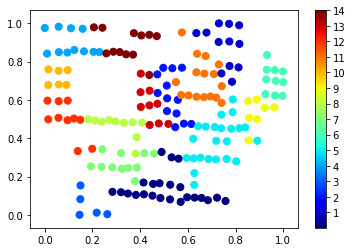

In [32]:
#print(rem_pci_all_n_pd)
group_median,group_drift = group_pcimap(rem_pci_all_n_pd)
#rsrp,group_drift = group(rem_rsrp)
#print("rem_rsrp==",rsrp)
#rem_rsrp.to_csv("rsrp.csv")
#group_median,group_drift = group(rem_test)
kmeans = KMeans(n_clusters=15)
#np.savetxt('group_median.csv', group_median, delimiter=',', fmt='%f')
#group_median = pd.read_csv("group_median.csv")
#print(rem_pci['pci'])
kmeans_fit = kmeans.fit(rem_pci_all_n_pd)
y_kmeans = kmeans.predict(rem_pci_all_n_pd)
#kmeans_fit = kmeans.fit(group_median)
#print(group_median)
#y_kmeans = kmeans.predict(group_median)
#print(y_kmeans)
#print(y_kmeans.shape)


#print(y_kmeans_pd)

#add_kmeans = pd.merge(rem_pci,y_kmeans_pd, left_index=True, right_index=True)
#print(add_kmeans)
#add_kmeans.to_csv('add_kmeans.csv')
#print(group_median)
rem_pci_all_pd = pd.DataFrame(rem_pci_all_copy,columns=['x','y','rsrp','pci_37','pci_38','pci_39','pci_40','pci_41','pci_42','pci'])
#print(type(rem_pci_all_pd))
#print(type(add_kmeans))

#print(rem_pci_all_pd)

plt.scatter(rem_pci_all_n_pd['x'], rem_pci_all_n_pd['y'], s=50, c=y_kmeans, cmap='jet');
y_kmeans_pd = pd.DataFrame({'zone':y_kmeans})
add_kmeans = pd.merge(rem_pci_all_pd,y_kmeans_pd, left_index=True, right_index=True)
#print(add_kmeans)
#add_kmeans = pd.merge(rem_pci_all_pd['pci'],add_kmeans, left_index=True, right_index=True)
for i in range(14,-1,-1):
    add_kmeans['zone'].replace(i,i+1,inplace=True)
'''
add_kmeans['zone'].replace(5,6,inplace=True)
add_kmeans['zone'].replace(4,5,inplace=True)
add_kmeans['zone'].replace(3,4,inplace=True)
add_kmeans['zone'].replace(2,3,inplace=True)
add_kmeans['zone'].replace(1,2,inplace=True)
add_kmeans['zone'].replace(0,1,inplace=True)
'''
add_kmeans['pci'] = add_kmeans['pci'].map(lambda x:int(x))

add_kmeans.to_csv('aaa.csv')
add_kmeans.values[:,:]
add_kmeans = add_kmeans.drop(['pci_37','pci_38','pci_39','pci_40','pci_41','pci_42'], axis=1)
add_kmeans = add_kmeans[['x','y','pci','rsrp','zone']]
add_kmeans = add_kmeans.values
#print(add_kmeans)
np.savetxt('./zone_result/set16_noleft_cluster.csv', add_kmeans, delimiter=',', fmt='%s')
#y_kmeans = np.reshape(y_kmeans, (27, 105))
#np.savetxt('y_kmeans.csv', y_kmeans, delimiter=',', fmt='%f')
cluster_labels = kmeans_fit.labels_
silhouette_avg = metrics.silhouette_score(rem_pci_all_n_pd, cluster_labels)
#print(silhouette_avg)
plt.colorbar(ticks=range(1,15))

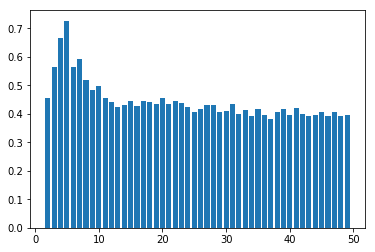

[0.45384080371480506, 0.5635911415070507, 0.6655271872223051, 0.7262362907970129, 0.5633363005172461, 0.5933055625289563, 0.5173305129330517, 0.48453505092971655, 0.4989307238943442, 0.4563987957662074, 0.44016884255225563, 0.4246050601576958, 0.43153257694740904, 0.44425737040940133, 0.42837100811012213, 0.4436725626436123, 0.4420963823598928, 0.43429586018316146, 0.45632434950326134, 0.4353613193002334, 0.4440987038553623, 0.43932397679289026, 0.4246583007900866, 0.4077067491525704, 0.41778618815234425, 0.43048856171631733, 0.4307242936203271, 0.40483509774803567, 0.409839195997466, 0.43527691671373503, 0.39886648136672576, 0.41212779594696736, 0.3916000177637509, 0.416704705785756, 0.39528180151713976, 0.3819046011431702, 0.4063430319583356, 0.41608154821312915, 0.3939031123456992, 0.41965085507479405, 0.40022055860061556, 0.3906211509989477, 0.3943172716806943, 0.407596748321436, 0.3922778191009087, 0.40447741444246393, 0.39169236161882487, 0.3958311724606055]


In [23]:
# 迴圈
silhouette_avgs = []
ks = range(2, 50)
for k in ks:
    kmeans_fit = cluster.KMeans(n_clusters = k).fit(rem_pci_all_n_pd)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg = metrics.silhouette_score(rem_pci_all_n_pd, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

# 作圖並印出 k = 2 到 10 的績效
plt.bar(ks, silhouette_avgs)
plt.show()
print(silhouette_avgs)